This notebook collects total weekly ridership for the DC metro from 1977 through 2016. The data is retrieved from a PDF. Analysis includes:
- EDA by system total and by individual stations
- Moving average smoothing
- Autoregression

# Imports

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [40]:
# set size of plots
plt.rcParams["figure.figsize"] = (12, 10)

In [41]:
from tabula import read_pdf

# WMATA Ridership Data

In [42]:
# read data into dataframe from PDF sheet
df_raw = read_pdf('data/2016_historical_rail_ridership.pdf', pandas_options={'header': None})

In [43]:
# column has two values concatenated

df_raw.iloc[0, 34]

'20,586 20,025'

In [44]:
# split data in column 34

df_raw[34].apply(lambda x: x.split(' '))

0       [20,586, 20,025]
1       [22,586, 22,142]
2       [27,643, 25,423]
3         [7,462, 6,447]
4         [9,206, 9,372]
5       [25,238, 23,874]
6         [4,451, 4,051]
7         [5,585, 5,341]
8         [4,670, 4,536]
9         [5,204, 5,171]
10      [11,311, 10,565]
11        [7,670, 7,406]
12        [3,192, 3,155]
13        [1,484, 1,400]
14        [1,708, 1,529]
15        [2,177, 2,100]
16        [3,586, 3,438]
17        [4,855, 4,522]
18        [4,220, 3,942]
19        [7,214, 6,724]
20        [5,421, 4,905]
21      [17,320, 16,812]
22      [12,844, 11,888]
23        [7,870, 7,461]
24      [14,324, 14,009]
25      [22,302, 21,258]
26      [17,296, 16,312]
27      [13,831, 13,591]
28        [1,480, 1,583]
29      [16,873, 15,869]
             ...        
64        [5,508, 5,337]
65        [1,861, 1,797]
66        [2,854, 2,605]
67        [3,127, 3,152]
68        [3,190, 3,305]
69        [4,112, 3,878]
70        [1,425, 1,330]
71        [8,182, 7,848]
72        [2,948, 3,062]


In [45]:
# insert new column of split data

df_raw.insert(35, '34A', df_raw[34].apply(lambda x: x.split(' ')[1]))

In [46]:
# replace data in column 34 with split data

df_raw[34] = df_raw[34].apply(lambda x: x.split(' ')[0])

In [47]:
# remove NaN columns
value_columns = df_raw.columns[df_raw.iloc[0, :].notnull()]
df = df_raw[value_columns].copy()
df.head()

,0,1,3,5,7,9,11,13,15,17,...,55,57,59,61,63,65,67,68,69,70
0,Dupont Circle,"7,784","10,124","13,617","15,643","14,128","11,628","13,894","16,767","17,099",...,"24,149","24,591","23,561","22,907","22,721","18,830","21,084","20,889","20,415","17,519"
1,Farragut North,"7,950","12,531","12,790","15,087","13,102","16,049","15,150","19,446","23,505",...,"26,934","26,506","25,311","24,105","23,796","26,773","25,351","25,398","25,294","22,949"
2,Metro Center,"10,493","13,704","19,400","18,516","19,608","17,635","17,154","16,550","19,386",...,"29,798","30,615","30,569","29,698","28,983","28,802","28,039","27,883","27,058","24,160"
3,Gallery Place-Chinat,"2,100","2,505","3,938","4,057","4,141","3,753","5,752","6,938","6,708",...,"21,921","25,136","25,747","25,894","25,777","26,587","25,820","25,780","25,820","22,375"
4,Judiciary Square,"5,490","7,806","7,955","8,527","7,680","7,175","5,576","7,740","7,552",...,"10,115","10,234","10,369","9,951","9,643","9,253","9,166","8,960","8,778","8,147"


In [48]:
cols = np.arange(1977, 2017)

In [49]:
cols

array([1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015, 2016])

In [50]:
# remove 1983 year from array (no record)

cols = np.delete(cols, np.where(cols == 1983))

In [51]:
col_names = ["Station"]

for i in cols:
    col_names.append(i)

In [52]:
# reassign column names and reset index

df.columns = col_names
df.iloc[-1, 0] = "Total"
df.set_index(df.iloc[:, 0].values, inplace=True)
df = df.drop(columns='Station')

In [53]:
df.head()

,1977,1978,1979,1980,1981,1982,1984,1985,1986,1987,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Dupont Circle,"7,784","10,124","13,617","15,643","14,128","11,628","13,894","16,767","17,099","18,838",...,"24,149","24,591","23,561","22,907","22,721","18,830","21,084","20,889","20,415","17,519"
Farragut North,"7,950","12,531","12,790","15,087","13,102","16,049","15,150","19,446","23,505","23,287",...,"26,934","26,506","25,311","24,105","23,796","26,773","25,351","25,398","25,294","22,949"
Metro Center,"10,493","13,704","19,400","18,516","19,608","17,635","17,154","16,550","19,386","25,356",...,"29,798","30,615","30,569","29,698","28,983","28,802","28,039","27,883","27,058","24,160"
Gallery Place-Chinat,"2,100","2,505","3,938","4,057","4,141","3,753","5,752","6,938","6,708","6,752",...,"21,921","25,136","25,747","25,894","25,777","26,587","25,820","25,780","25,820","22,375"
Judiciary Square,"5,490","7,806","7,955","8,527","7,680","7,175","5,576","7,740","7,552","8,300",...,"10,115","10,234","10,369","9,951","9,643","9,253","9,166","8,960","8,778","8,147"


In [54]:
# reformat ridership values to ints

df_ref = df.copy()

for year in df.columns:
    df_ref[year] = df[year].apply(lambda x: pd.to_numeric(str(x).replace(",", ""), errors="coerce"))

totals = df_ref.iloc[-1, :]
df_ref = df_ref.drop(index='Total')

In [55]:
df_ref

,1977,1978,1979,1980,1981,1982,1984,1985,1986,1987,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Dupont Circle,7784.0,10124.0,13617.0,15643.0,14128.0,11628.0,13894.0,16767.0,17099.0,18838.0,...,24149.0,24591.0,23561.0,22907.0,22721.0,18830.0,21084.0,20889.0,20415.0,17519.0
Farragut North,7950.0,12531.0,12790.0,15087.0,13102.0,16049.0,15150.0,19446.0,23505.0,23287.0,...,26934.0,26506.0,25311.0,24105.0,23796.0,26773.0,25351.0,25398.0,25294.0,22949.0
Metro Center,10493.0,13704.0,19400.0,18516.0,19608.0,17635.0,17154.0,16550.0,19386.0,25356.0,...,29798.0,30615.0,30569.0,29698.0,28983.0,28802.0,28039.0,27883.0,27058.0,24160.0
Gallery Place-Chinat,2100.0,2505.0,3938.0,4057.0,4141.0,3753.0,5752.0,6938.0,6708.0,6752.0,...,21921.0,25136.0,25747.0,25894.0,25777.0,26587.0,25820.0,25780.0,25820.0,22375.0
Judiciary Square,5490.0,7806.0,7955.0,8527.0,7680.0,7175.0,5576.0,7740.0,7552.0,8300.0,...,10115.0,10234.0,10369.0,9951.0,9643.0,9253.0,9166.0,8960.0,8778.0,8147.0
Union Station,7038.0,9248.0,11386.0,12540.0,10464.0,10836.0,12227.0,11761.0,13720.0,15433.0,...,32935.0,34383.0,34465.0,32745.0,33697.0,33250.0,32975.0,32465.0,31186.0,28864.0
Rhode Island Ave.,5665.0,4753.0,4307.0,4989.0,4226.0,4073.0,4069.0,4891.0,5079.0,5837.0,...,6046.0,6144.0,6121.0,5651.0,5227.0,5645.0,5896.0,6070.0,6001.0,5552.0
Brookland -,NaN,3451.0,5204.0,6333.0,5740.0,5538.0,5428.0,5741.0,6649.0,6573.0,...,6795.0,7036.0,7158.0,6858.0,6576.0,6827.0,6676.0,6673.0,6619.0,5672.0
Fort Totten -,NaN,2969.0,4896.0,5294.0,4481.0,4150.0,3539.0,4363.0,4868.0,5600.0,...,6877.0,7071.0,7198.0,7543.0,7364.0,7636.0,7853.0,7976.0,7932.0,7566.0
Takoma -,NaN,2556.0,3873.0,4809.0,4687.0,4137.0,4629.0,5195.0,5304.0,5529.0,...,6466.0,6664.0,6811.0,6685.0,6488.0,6143.0,5823.0,5813.0,5774.0,5190.0


# Time Series Analysis

## Total Ridership

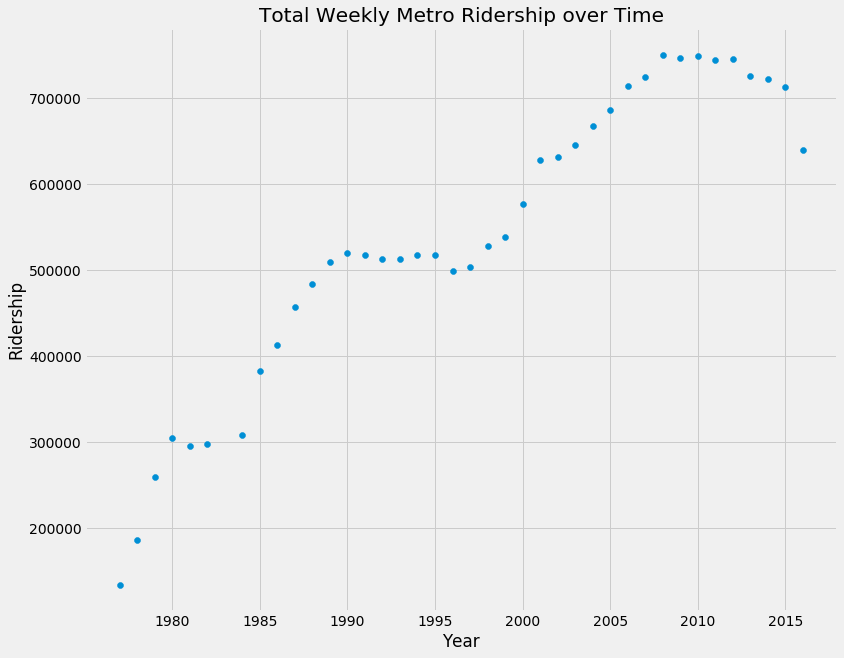

In [56]:
with plt.style.context(('fivethirtyeight')):
    
    x = df.columns
    y = totals
    
    plt.scatter(x, y)
    plt.title('Total Weekly Metro Ridership over Time')
    plt.xlabel('Year')
    plt.ylabel('Ridership')

### Moving Average Smoothing

In [57]:
def avg_win(data, win_size):
    # initialize blank array
    mov_avg = [None] * len(data)
    # shift value to center output
    shift = win_size//2
    # iterate through windows
    for start in range(len(data) - (win_size - 1)):
        window_points = [data[i] for i in range(start, start + win_size)]
        mov_avg[start + shift] = np.mean(window_points)
    # ouput array of moving average data
    return(mov_avg)

In [58]:
mov_avg = avg_win(totals.values, 3)

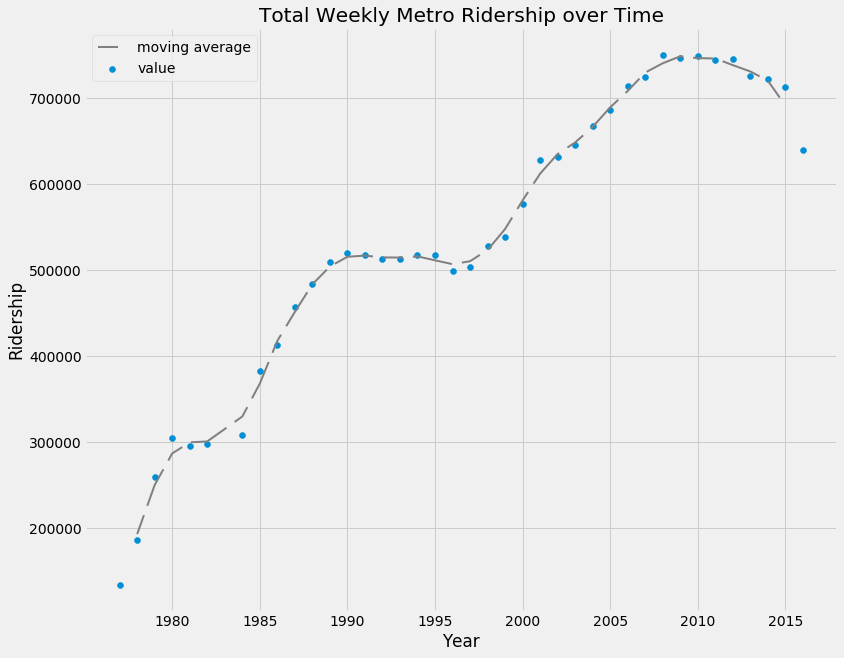

In [59]:
with plt.style.context(('fivethirtyeight')):
    
    x = df.columns
    y = totals
    
    plt.scatter(x, y, label='value')
    plt.plot(x, mov_avg, dashes=[10, 5, 20, 5], linewidth=2, color='gray', label='moving average')
    plt.title('Total Weekly Metro Ridership over Time')
    plt.xlabel('Year')
    plt.ylabel('Ridership')
    plt.legend()

### Autoregression

In [60]:
from sklearn.linear_model import LinearRegression

In [61]:
ar_timeseries = pd.DataFrame(totals)
ar_timeseries.head()

,Total
1977,134439.0
1978,186023.0
1979,259877.0
1980,305426.0
1981,296028.0


In [62]:
# reference previous year ridership
ar_timeseries['1_yrs_past'] = ar_timeseries.shift()
ar_timeseries.head()

,Total,1_yrs_past
1977,134439.0,NaN
1978,186023.0,134439.0
1979,259877.0,186023.0
1980,305426.0,259877.0
1981,296028.0,305426.0


In [63]:
# fit linear regression model

ar_model = LinearRegression()
X = ar_timeseries.dropna()[["1_yrs_past"]]
y = ar_timeseries.dropna()[["Total"]]
ar_model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [64]:
ar_model.intercept_, ar_model.coef_

(array([58514.85496612]), array([[0.91562831]]))

In [65]:
y_pred = ar_model.predict(X)

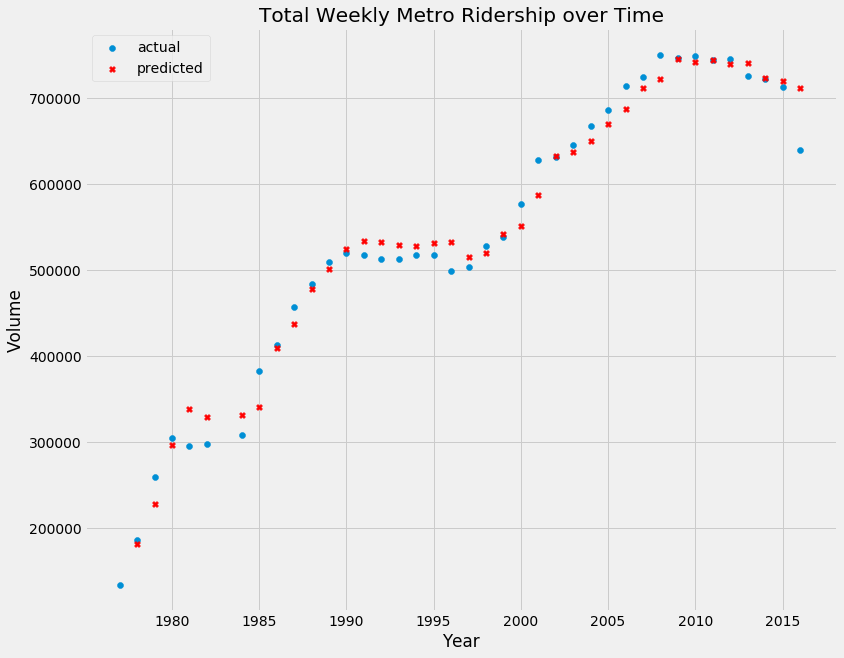

In [66]:
# plot actuals and predicted

x_true = ar_timeseries.index
y_true = ar_timeseries['Total'].values

x_pred = df.columns[1:]


with plt.style.context(('fivethirtyeight')):
    
    # plot actual values
    plt.scatter(x_true, y_true, label='actual')
    
    # plot model prediction (red x signs)
    plt.scatter(x_pred, y_pred, color='red', marker='X', label='predicted')

    # Labels
    plt.title('Total Weekly Metro Ridership over Time')
    plt.xlabel('Year')
    plt.ylabel('Volume')
    plt.legend();

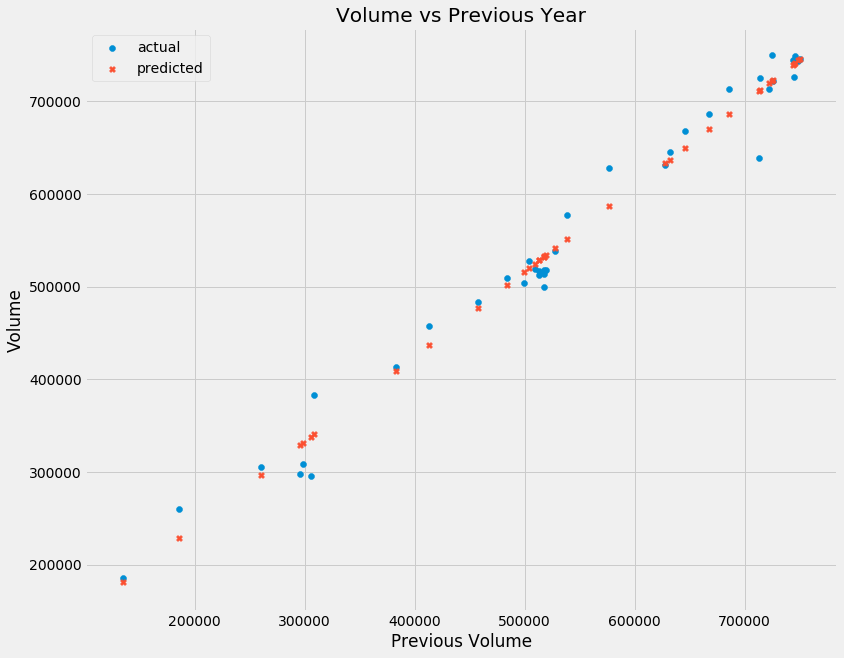

In [67]:
# plot year volume vs previous year volume

with plt.style.context(('fivethirtyeight')):
    
    # plot actual values
    plt.scatter(X, y, label='actual')
    plt.scatter(X, y_pred, marker='X', label='predicted')

    # Labels
    plt.title('Volume vs Previous Year')
    plt.xlabel('Previous Volume')
    plt.ylabel('Volume')
    plt.legend();

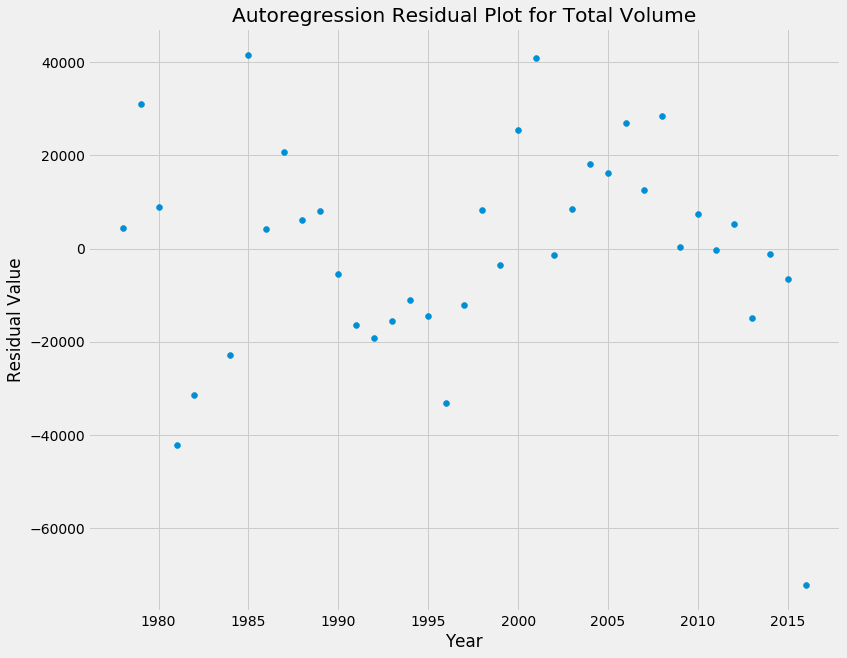

In [68]:
# plot residuals

with plt.style.context(('fivethirtyeight')):
    
    residuals = y - y_pred
    plt.scatter(x[1:], residuals)

    # Labels
    plt.title('Autoregression Residual Plot for Total Volume')
    plt.xlabel('Year')
    plt.ylabel('Residual Value');

## Ridership by Station

In [69]:
stations = df_ref.iloc[:, 0].dropna().index
stations

Index(['Dupont Circle', 'Farragut North', 'Metro Center',
       'Gallery Place-Chinat', 'Judiciary Square', 'Union Station',
       'Rhode Island Ave.', 'Stadium-Armory', 'Potomac Ave.', 'Eastern Market',
       'Capitol South', 'Federal Center SW', 'L'Enfant Plaza', 'Smithsonian',
       'Federal Triangle', 'McPherson Square', 'Farragut West',
       'Foggy Bottom-GWU', 'Rosslyn', 'Arlington Cemetery', 'Pentagon',
       'Pentagon City', 'Crystal City', 'Nat'l Airport (Reagan'],
      dtype='object')

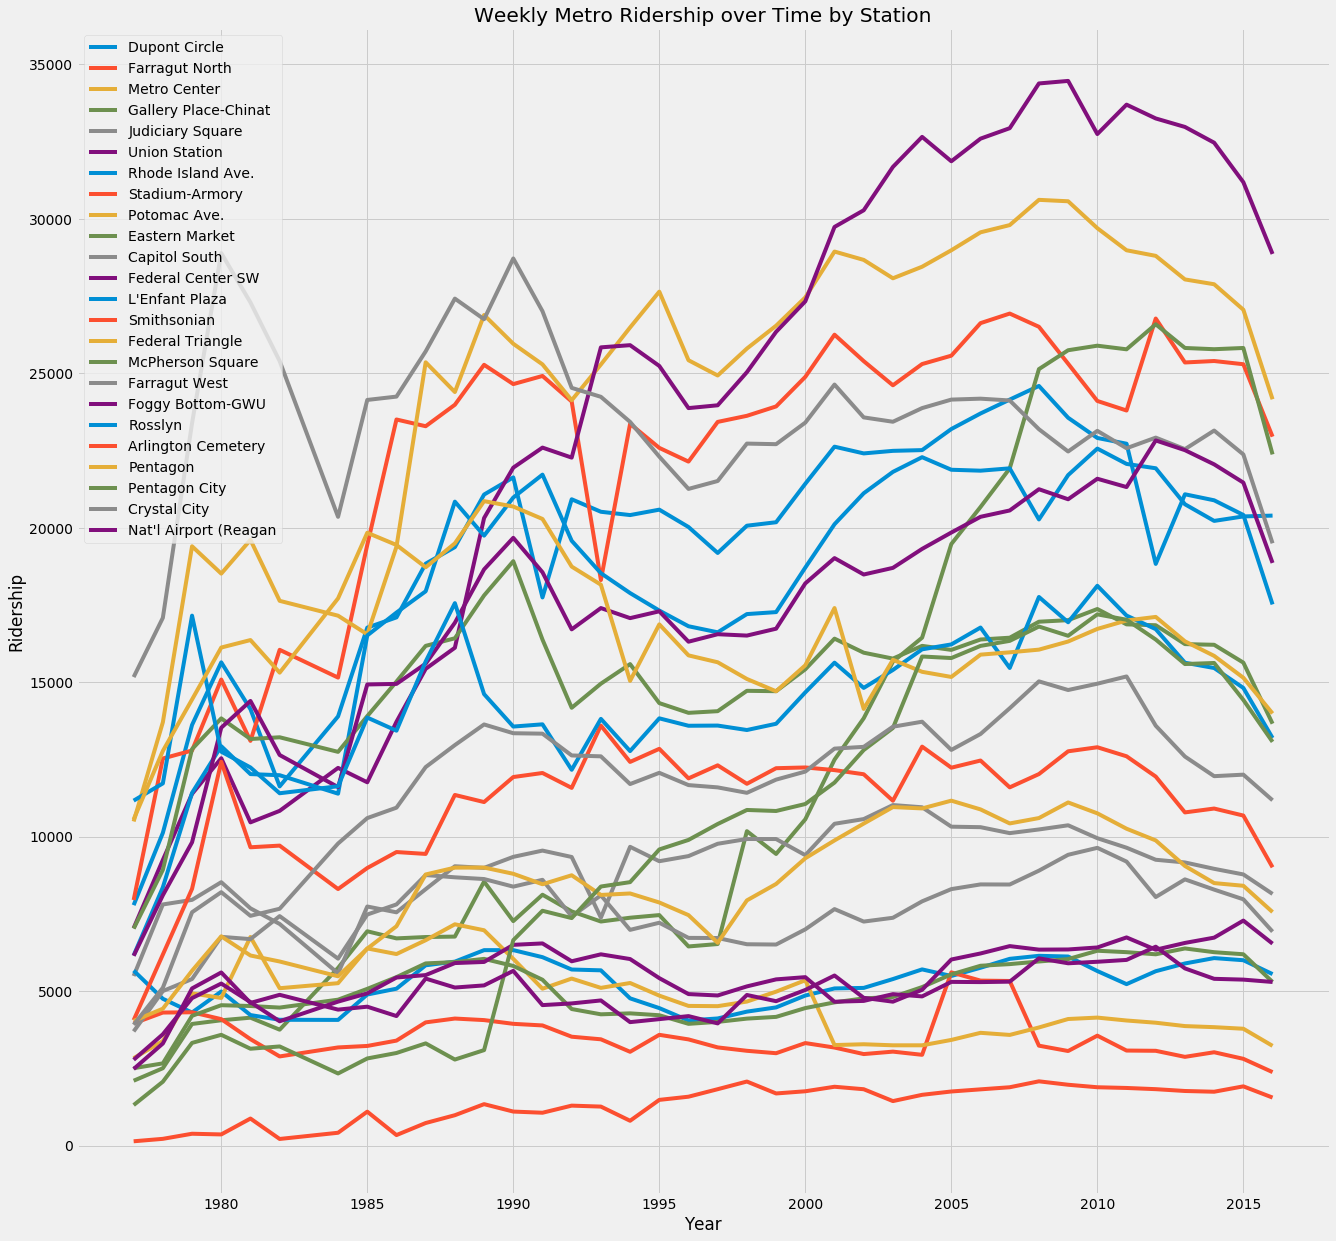

In [70]:
with plt.style.context(('fivethirtyeight')):

    fig, ax2 = plt.subplots(figsize=(20, 20))
    
    x = df_ref.columns
    
    for station in stations:
        y = df_ref.loc[station, :]
        ax2.plot(x, y, label=station)
    
    ax2.legend(loc='upper left')
    ax2.set_title('Weekly Metro Ridership over Time by Station')
    ax2.set_xlabel('Year')
    ax2.set_ylabel('Ridership')

In [71]:
stations = ['Dupont Circle', 'Metro Center', 'Gallery Place-Chinat', 'Union Station', 'Nat\'l Airport (Reagan']

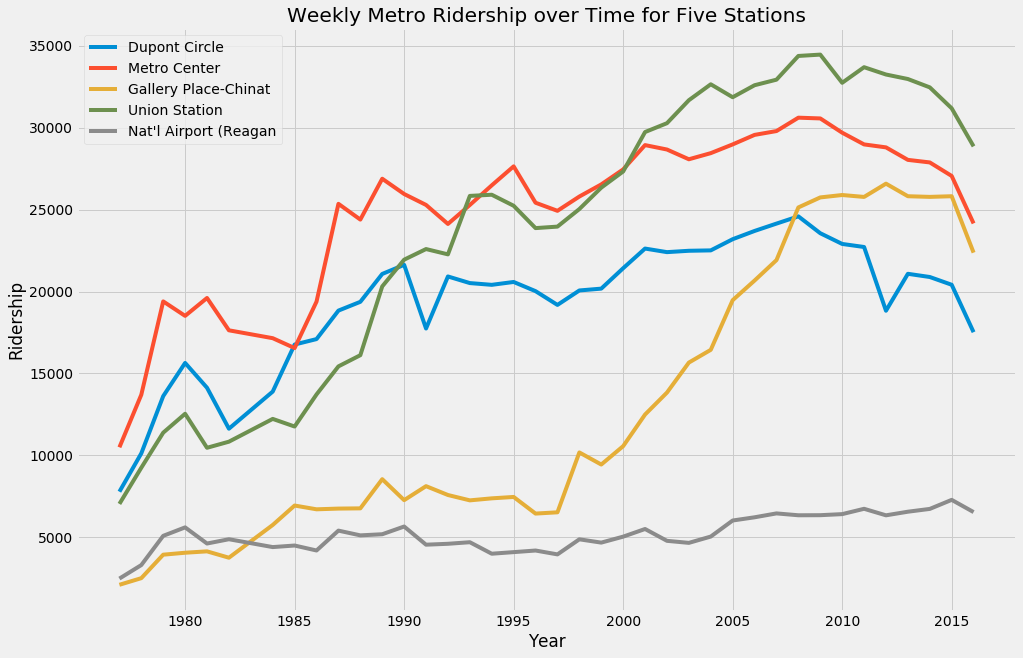

In [72]:
with plt.style.context(('fivethirtyeight')):

    fig, ax2 = plt.subplots(figsize=(15, 10))
    
    x = df_ref.columns
    
    for station in stations:
        y = df_ref.loc[station, :]
        ax2.plot(x, y, label=station)
    
    ax2.legend(loc='upper left')
    ax2.set_title('Weekly Metro Ridership over Time for Five Stations')
    ax2.set_xlabel('Year')
    ax2.set_ylabel('Ridership')

# Boxofficemojo Example

## Retrieve Data

In [73]:
weekly_timeseries = [
    63440279,
    38849255,
    20544731,
    11643562,
    6309002,
    4555993,
    2648047,
    1645168,
    966275,
    601794,
    663222,
    471641,
    266007,
    190614,
    129637,
    119106,
    94384,
    473315,
    24322
    ]

## Visualize Data over Time

Text(0,0.5,'Weekly Gross')

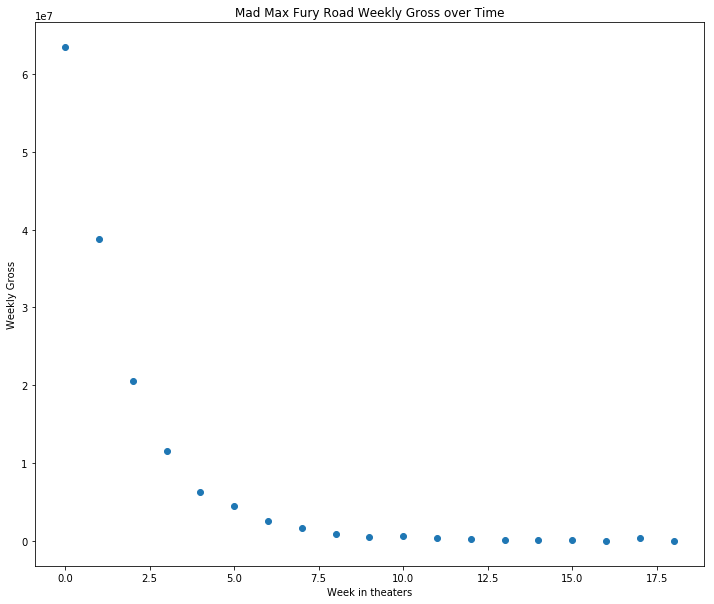

In [74]:
# plot weekly grosses

x = range(len(weekly_timeseries))
y = weekly_timeseries
plt.scatter(x,y)
plt.title("Mad Max Fury Road Weekly Gross over Time")
plt.xlabel("Week in theaters")
plt.ylabel("Weekly Gross")

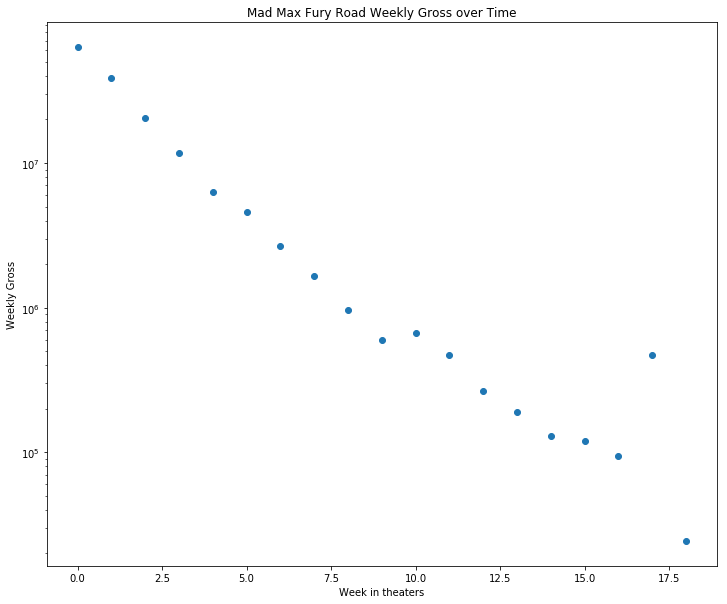

In [75]:
# plot in log scale

x = range(len(weekly_timeseries))
y = weekly_timeseries
plt.scatter(x,y)
plt.title("Mad Max Fury Road Weekly Gross over Time")
plt.xlabel("Week in theaters")
plt.ylabel("Weekly Gross")
plt.yscale("log")

## Auto-regressive Model

In [76]:
timeseries_df = pd.DataFrame(weekly_timeseries, columns=["weekly_gross"])
timeseries_df

,weekly_gross
0,63440279
1,38849255
2,20544731
3,11643562
4,6309002
5,4555993
6,2648047
7,1645168
8,966275
9,601794


In [77]:
# create previous week feature

timeseries_df['prev_week']=timeseries_df.weekly_gross.shift()
timeseries_df

,weekly_gross,prev_week
0,63440279,NaN
1,38849255,63440279.0
2,20544731,38849255.0
3,11643562,20544731.0
4,6309002,11643562.0
5,4555993,6309002.0
6,2648047,4555993.0
7,1645168,2648047.0
8,966275,1645168.0
9,601794,966275.0


In [78]:
from sklearn.linear_model import LinearRegression

In [79]:
# fit linear regression model

model = LinearRegression()
X = timeseries_df.dropna()[["prev_week"]]
y = timeseries_df.dropna()[["weekly_gross"]]
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [80]:
# print coef and intercept
model.coef_, model.intercept_

(array([[0.58806191]]), array([-7628.30132035]))

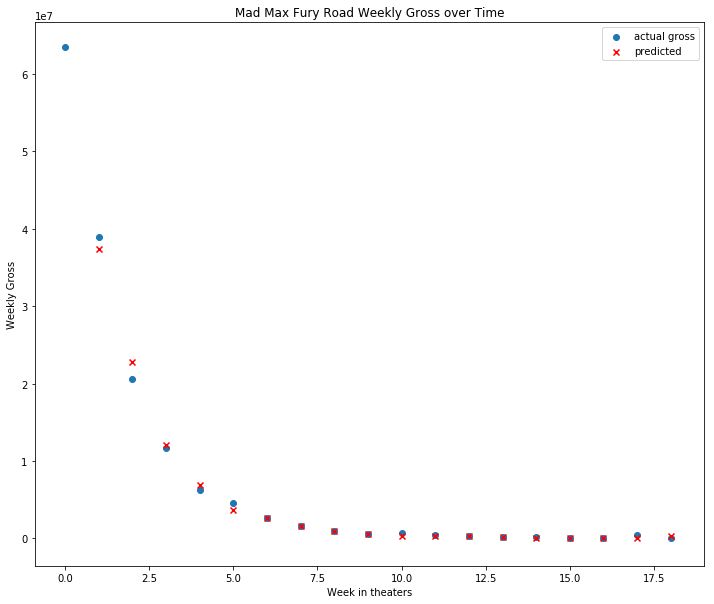

In [81]:
# plot actuals and predicted

x = range(len(weekly_timeseries))
y_true = weekly_timeseries
# plot actual grosses (blue spheres)
plt.scatter(x,y_true, label="actual gross")

# we can only predict for weeks where we have a number for
# the previous week. That is a feature. 
x_pred = x[1:]
y_pred = model.predict(X)

# plot model prediction (red x signs)
plt.scatter(x_pred,y_pred, color='red', marker="x", label="predicted")

# Labels
plt.title("Mad Max Fury Road Weekly Gross over Time")
plt.xlabel("Week in theaters")
plt.ylabel("Weekly Gross")
plt.legend();

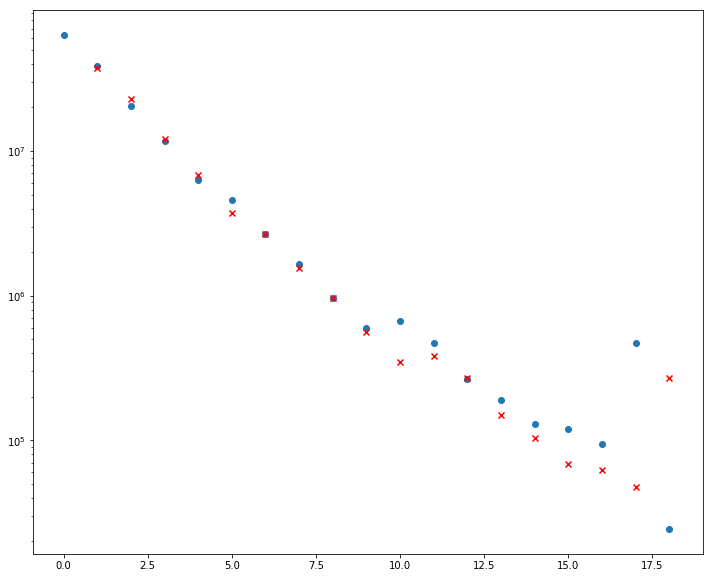

In [82]:
# plot on log scale

plt.scatter(x,y_true)
plt.scatter(x_pred,y_pred, color='red', marker="x")
plt.yscale('log')

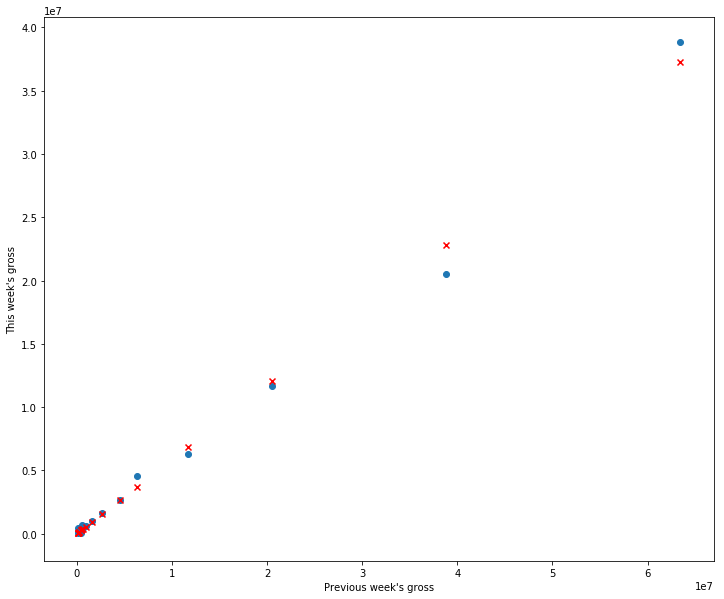

In [83]:
# plot target vs feature (this week's gross vs last week's gross)

plt.scatter(timeseries_df.prev_week[1:], weekly_timeseries[1:])
plt.scatter(timeseries_df.prev_week[1:], y_pred, color='red', marker='x')
plt.xlabel("Previous week's gross")
plt.ylabel("This week's gross");

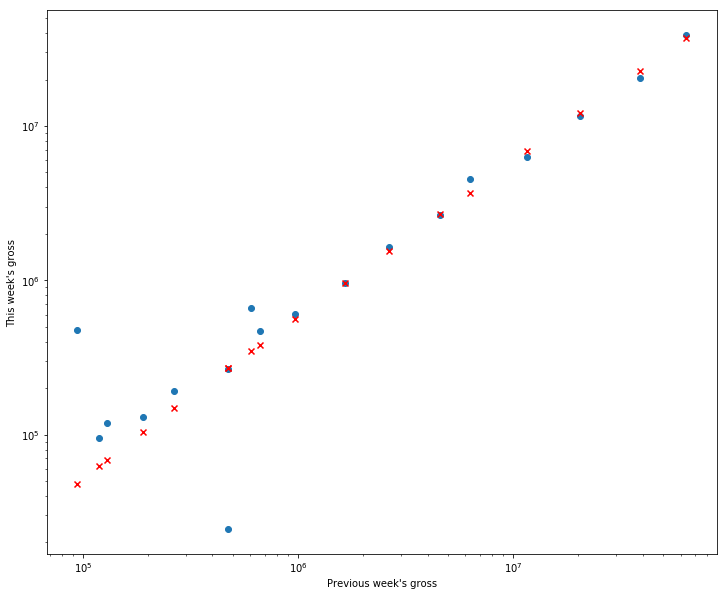

In [84]:
# plot in log scale

plt.scatter(timeseries_df.prev_week[1:], weekly_timeseries[1:])
plt.scatter(timeseries_df.prev_week[1:], y_pred, color='red', marker='x')
plt.xlabel("Previous week's gross")
plt.ylabel("This week's gross")
plt.xscale('log')
plt.yscale('log')

# Weight Example

## Moving Average Smoothing

Text(0,0.5,'Weight in kgs')

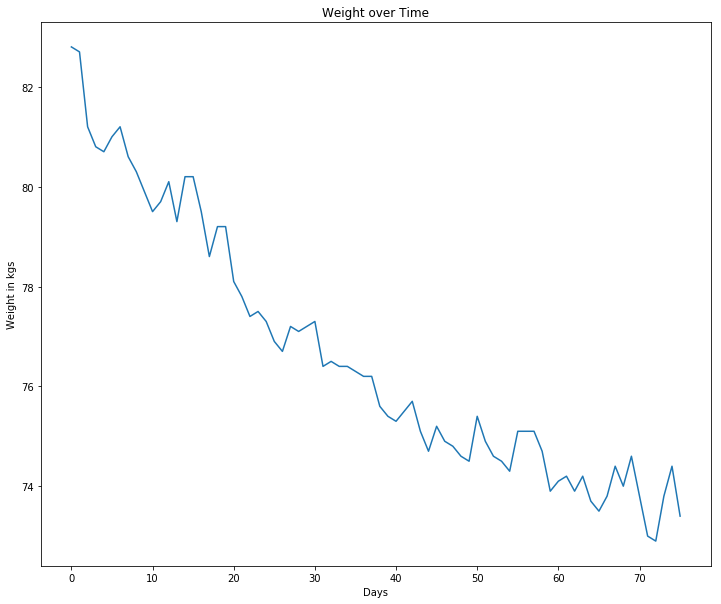

In [85]:
weight_timeseries = [82.8, 82.7, 81.2, 80.8, 80.7, 81, 81.2, 80.6, 80.3, 79.9, 79.5, 79.7, 80.1, 79.3, 80.2, 80.2, 79.5, 78.6, 79.2, 79.2, 78.1, 77.8, 77.4, 77.5, 77.3, 76.9, 76.7, 77.2, 77.1, 77.2, 77.3, 76.4, 76.5, 76.4, 76.4, 76.3, 76.2, 76.2, 75.6, 75.4, 75.3, 75.5, 75.7, 75.1, 74.7, 75.2, 74.9, 74.8, 74.6, 74.5, 75.4, 74.9, 74.6, 74.5, 74.3, 75.1, 75.1, 75.1, 74.7, 73.9, 74.1, 74.2, 73.9, 74.2, 73.7, 73.5, 73.8, 74.4, 74, 74.6, 73.8, 73, 72.9, 73.8, 74.4, 73.4]
x = range(len(weight_timeseries))
y = weight_timeseries
plt.plot(x,y)
plt.title("Weight over Time")
plt.xlabel("Days")
plt.ylabel("Weight in kgs")

In [86]:
MA_10 = [None] * len(weight_timeseries)
start, end = 5, len(MA_10) - 5

In [87]:
for window in range(start, end):
    points_in_window = [weight_timeseries[i] for i in range(window-5, window+5)]
    MA_10[window] = sum(points_in_window)/10

In [88]:
MA_10

[None,
 None,
 None,
 None,
 None,
 81.11999999999999,
 80.78999999999999,
 80.49,
 80.38000000000001,
 80.23,
 80.18,
 80.1,
 79.92999999999999,
 79.73,
 79.62000000000002,
 79.55000000000001,
 79.41000000000001,
 79.22,
 78.94999999999999,
 78.77,
 78.47999999999999,
 78.15,
 77.87,
 77.73,
 77.52000000000001,
 77.32000000000002,
 77.24,
 77.1,
 77.01,
 76.89999999999999,
 76.80999999999999,
 76.74999999999999,
 76.7,
 76.6,
 76.45,
 76.27000000000001,
 76.07000000000001,
 75.97999999999999,
 75.9,
 75.77,
 75.60000000000001,
 75.49000000000001,
 75.36,
 75.22,
 75.11999999999999,
 75.03,
 75.03999999999999,
 74.97999999999999,
 74.86999999999999,
 74.81,
 74.77,
 74.75999999999999,
 74.78,
 74.81,
 74.82000000000001,
 74.76,
 74.63000000000001,
 74.56000000000002,
 74.49000000000001,
 74.46000000000001,
 74.4,
 74.24000000000001,
 74.11,
 74.03999999999999,
 73.97,
 74.03999999999999,
 74.01,
 73.89,
 73.78999999999999,
 73.74999999999999,
 73.82000000000001,
 None,
 None,
 None,
 N

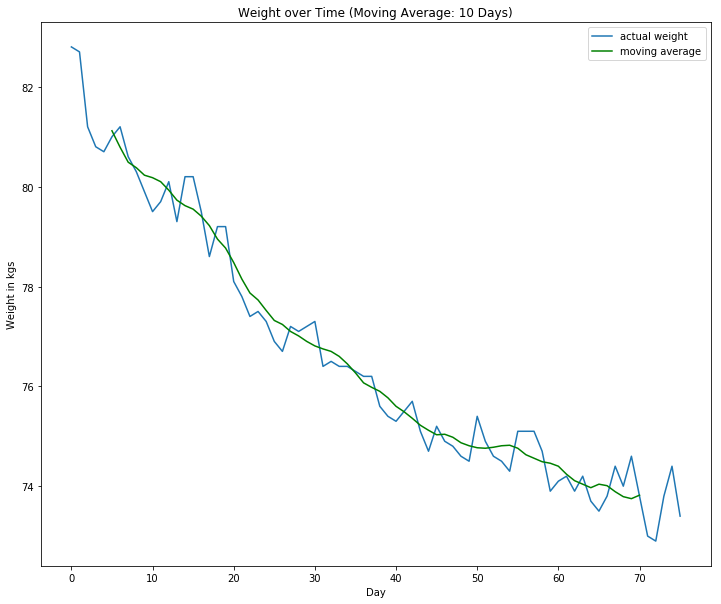

In [89]:
x = range(len(weight_timeseries))
y_real = weight_timeseries

start, end = 5, len(MA_10)-5
x_ma = range(start, end)
y_ma = MA_10[start:end]

plt.plot(x, y, label="actual weight")
plt.plot(x_ma, y_ma, color='green', label="moving average")
plt.title("Weight over Time (Moving Average: 10 Days)")
plt.xlabel("Day")
plt.ylabel("Weight in kgs")
plt.legend();